ƒê·ªçc c√°c file Excel trong b·ªô d·ªØ li·ªáu

In [80]:
import pandas as pd
import os
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [81]:
folder_path = "Data"
print(f"ƒêang ƒë·ªçc c√°c file Excel trong th∆∞ m·ª•c: {folder_path}\n")

ƒêang ƒë·ªçc c√°c file Excel trong th∆∞ m·ª•c: Data



Lo·∫°i b·ªè c√°c gi√° tr·ªã Null trong c√°c t·∫≠p d·ªØ li·ªáu

In [82]:
# ƒê·ªçc file v√† ki·ªÉm tra d·ªØ li·ªáu
for file_name in os.listdir(folder_path):
    if file_name.endswith(('.xlsx', '.xls')):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # ƒê·ªçc file Excel
            data = pd.read_excel(file_path)
            
            # L·∫•y s·ªë h√†ng v√† s·ªë c·ªôt
            num_rows = data.shape[0]
            
            print(f"File: {file_name}")
            print(f"K√≠ch th∆∞·ªõc: {num_rows} h√†ng")

            # Null checking
            null_counts = data.isnull().sum()
            
            # Hi·ªÉn th·ªã c√°c c·ªôt c√≥ gi√° tr·ªã null
            if null_counts.sum() > 0:
                print("S·ªë gi√° tr·ªã null theo c·ªôt:")
                print(null_counts[null_counts > 0])  # Ch·ªâ hi·ªÉn th·ªã c·ªôt c√≥ null
                print(f"\nT·ªïng s·ªë gi√° tr·ªã null: {null_counts.sum()}")
            else:
                print("Kh√¥ng c√≥ gi√° tr·ªã null n√†o trong file n√†y")
            
            print("-" * 50)

        except Exception as e:
            print(f"L·ªói khi ƒë·ªçc file {file_name}: {e}")

File: SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx
K√≠ch th∆∞·ªõc: 779 h√†ng
Kh√¥ng c√≥ gi√° tr·ªã null n√†o trong file n√†y
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-1.00_modified.xlsx
K√≠ch th∆∞·ªõc: 776 h√†ng
Kh√¥ng c√≥ gi√° tr·ªã null n√†o trong file n√†y
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-2.00_modified.xlsx
K√≠ch th∆∞·ªõc: 776 h√†ng
Kh√¥ng c√≥ gi√° tr·ªã null n√†o trong file n√†y
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-3.00_modified.xlsx
K√≠ch th∆∞·ªõc: 776 h√†ng
Kh√¥ng c√≥ gi√° tr·ªã null n√†o trong file n√†y
--------------------------------------------------
File: SHGC-0.3_Tvis-0.9_Uval-0.05_modified.xlsx
K√≠ch th∆∞·ªõc: 776 h√†ng
Kh√¥ng c√≥ gi√° tr·ªã null n√†o trong file n√†y
--------------------------------------------------
File: SHGC-0.3_Tvis-0.9_Uval-1.00_modified.xlsx
K√≠ch th∆∞·ªõc: 776 h√†ng
Kh√¥ng c√≥ gi√° tr·ªã null n√†o trong file n√†y
-------------

G·ªôp t·∫•t c·∫£ c√°c file l·∫°i v√†o m·ªôt DataFrame

In [83]:
# T·∫°o DataFrame cho train v√† test
df = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(('.xlsx', '.xls')):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # ƒê·ªçc file Excel
            data = pd.read_excel(file_path)

            
            # C·ªông d·ªìn v√†o bi·∫øn t·ªïng
            df = pd.concat([df, data], ignore_index=True)
            
            print(f"ƒê√£ x·ª≠ l√Ω: {file_name} ({len(data)} d√≤ng)")
            
        except Exception as e:
            print(f"L·ªói khi x·ª≠ l√Ω {file_name}: {str(e)}")

# K·∫øt qu·∫£ cu·ªëi c√πng
print("\nK·∫øt qu·∫£ t·ªïng h·ª£p:")
print(f"T·ªïng df: {len(df)} d√≤ng")

ƒê√£ x·ª≠ l√Ω: SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx (779 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.1_Tvis-0.9_Uval-1.00_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.1_Tvis-0.9_Uval-2.00_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.1_Tvis-0.9_Uval-3.00_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.3_Tvis-0.9_Uval-0.05_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.3_Tvis-0.9_Uval-1.00_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.3_Tvis-0.9_Uval-2.00_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.3_Tvis-0.9_Uval-3.00_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.3_Tvis-0.9_Uval-4.00_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.3_Tvis-0.9_Uval-5.00_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.3_Tvis-0.9_Uval-6.00_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.5_Tvis-0.9_Uval-0.05_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.7_Tvis-0.9_Uval-0.05_modified.xlsx (776 d√≤ng)
ƒê√£ x·ª≠ l√Ω: SHGC-0.9_Tvis-0.9_Uval-0.05_modified.xlsx (775 d√≤ng)

K·∫øt qu·∫£ t·ªïng h·ª£p:
T·ªïng 

In [84]:
df

in:SHGC  in:U-val   out:P1_l  out:P1_r   out:P1_x   out:P1_y  out:P2_l  \
0          0.1      0.05  20.000000  0.5 * Pi  40.000000  10.000000      20.0   
1          0.1      0.05  22.679492  0.5 * Pi  37.320508  20.000000      20.0   
2          0.1      0.05  25.773503  0.5 * Pi  30.000000  27.320508      20.0   
3          0.1      0.05  30.000000  0.5 * Pi  20.000000  30.000000      20.0   
4          0.1      0.05  37.320508  0.5 * Pi  10.000000  27.320508      20.0   
...        ...       ...        ...       ...        ...        ...       ...   
10861      NaN      0.90   2.679492  2.094395   5.000000 -11.339746      20.0   
10862      NaN      0.90  10.000000  2.094395  12.320508 -18.660254      20.0   
10863      NaN      0.90  14.226497  2.094395  22.320508 -21.339746      20.0   
10864      NaN      0.90  17.320508  2.094395  32.320508 -18.660254      20.0   
10865      NaN      0.90  20.000000  2.094395  39.641016 -11.339746      20.0   

       out:P2_r   out:P2_x   out:P2_y  ...  out:S3_d1  out:S3_d2  out:S3_d3  \
0      0.5 * Pi  60.000000  10.000000  ...  14.142136  14.142136  14.142136   
1      0.5 * Pi  57.320508  20.000000  ...  14.142136  14.142136  14.142136   
2      0.5 * Pi  50.000000  27.320508  ...  14.142136  14.142136  14.142136   
3      0.5 * Pi  40.000000  30.000000  ...  14.142136  14.142136  14.142136   
4      0.5 * Pi  30.000000  27.320508  ...  14.142136  14.142136  14.142136   
...         ...        ...        ...  ...        ...        ...        ...   
10861  2.094395  22.320508 -21.339746  ...  14.142136  14.142136  14.142136   
10862  2.094395  29.641016 -28.660254  ...  14.142136  14.142136  14.142136   
10863  2.094395  39.641016 -31.339746  ...  14.142136  14.142136  14.142136   
10864  2.094395  49.641016 -28.660254  ...  14.142136  14.142136  14.142136   
10865  2.094395  56.961524 -21.339746  ...  14.142136  14.142136  14.142136   

       out:S3_d4  out:S3_xi  out:S3_yi  out:Total-CoolingLoad (J)  \
0      14.142136  50.000000   0.000000              1882600000000   
1      14.142136  47.320508  10.000000              1848600000000   
2      14.142136  40.000000  17.320508              1794900000000   
3      14.142136  30.000000  20.000000              1807000000000   
4      14.142136  20.000000  17.320508              1846900000000   
...          ...        ...        ...                        ...   
10861  14.142136   8.660254 -25.000000             10899000000000   
10862  14.142136  15.980762 -32.320508             11035000000000   
10863  14.142136  25.980762 -35.000000             11179000000000   
10864  14.142136  35.980762 -32.320508             11183000000000   
10865  14.142136  43.301270 -25.000000             11040000000000   

       out:Total_HEAT-LOSS(J)  in:T-Vis in:SHCG  
0                125510000000       NaN     NaN  
1                128940000000       NaN     NaN  
2                133580000000       NaN     NaN  
3                132440000000       NaN     NaN  
4                130010000000       NaN     NaN  
...                       ...       ...     ...  
10861             17041000000      0.05     0.9  
10862             17255000000      0.05     0.9  
10863             16943000000      0.05     0.9  
10864             17098000000      0.05     0.9  
10865             16834000000      0.05     0.9  

[10866 rows x 56 columns]

Chuy·ªÉn gi√° tr·ªã Pi v·ªÅ s·ªë th·ª±c

In [85]:
# Chuy·ªÉn t·∫•t c·∫£ c√°c gi√° tr·ªã ch·ª©a "Pi" th√†nh s·ªë th·ª±c
# ---------------------------------
def replace_pi_with_float(df):
    df = df.copy()

    # Thay th·∫ø 'Pi' th√†nh gi√° tr·ªã s·ªë th·ª±c
    df = df.replace({'Pi': math.pi})

    # Thay th·∫ø c√°c bi·ªÉu th·ª©c d·∫°ng 'a * Pi' th√†nh s·ªë th·ª±c
    for col in df.columns:
        # Duy·ªát qua t·ª´ng √¥ v√† x·ª≠ l√Ω
        df[col] = df[col].apply(lambda x: eval(str(x).replace('Pi', 'math.pi')) if isinstance(x, str) else x)

    # X·ª≠ l√Ω c√°c gi√° tr·ªã NaN sau khi chuy·ªÉn ƒë·ªïi
    df = df.fillna(0)  # Thay th·∫ø NaN b·∫±ng 0
    # Ho·∫∑c lo·∫°i b·ªè c√°c h√†ng c√≥ NaN
    # df = df.dropna()  # B·ªè c√°c h√†ng ch·ª©a NaN

    return df

In [86]:
# √Åp d·ª•ng cho c·∫£ train v√† test
print ("D·ªØ li·ªáu tr∆∞·ªõc khi chuy·ªÉn ƒë·ªïi gi√° tr·ªã 'PI':")
df.head()

D·ªØ li·ªáu tr∆∞·ªõc khi chuy·ªÉn ƒë·ªïi gi√° tr·ªã 'PI':


in:SHGC  in:U-val   out:P1_l  out:P1_r   out:P1_x   out:P1_y  out:P2_l  \
0      0.1      0.05  20.000000  0.5 * Pi  40.000000  10.000000      20.0   
1      0.1      0.05  22.679492  0.5 * Pi  37.320508  20.000000      20.0   
2      0.1      0.05  25.773503  0.5 * Pi  30.000000  27.320508      20.0   
3      0.1      0.05  30.000000  0.5 * Pi  20.000000  30.000000      20.0   
4      0.1      0.05  37.320508  0.5 * Pi  10.000000  27.320508      20.0   

   out:P2_r   out:P2_x   out:P2_y  ...  out:S3_d1  out:S3_d2  out:S3_d3  \
0  0.5 * Pi  60.000000  10.000000  ...  14.142136  14.142136  14.142136   
1  0.5 * Pi  57.320508  20.000000  ...  14.142136  14.142136  14.142136   
2  0.5 * Pi  50.000000  27.320508  ...  14.142136  14.142136  14.142136   
3  0.5 * Pi  40.000000  30.000000  ...  14.142136  14.142136  14.142136   
4  0.5 * Pi  30.000000  27.320508  ...  14.142136  14.142136  14.142136   

   out:S3_d4  out:S3_xi  out:S3_yi  out:Total-CoolingLoad (J)  \
0  14.142136  50.000000   0.000000              1882600000000   
1  14.142136  47.320508  10.000000              1848600000000   
2  14.142136  40.000000  17.320508              1794900000000   
3  14.142136  30.000000  20.000000              1807000000000   
4  14.142136  20.000000  17.320508              1846900000000   

   out:Total_HEAT-LOSS(J)  in:T-Vis in:SHCG  
0            125510000000       NaN     NaN  
1            128940000000       NaN     NaN  
2            133580000000       NaN     NaN  
3            132440000000       NaN     NaN  
4            130010000000       NaN     NaN  

[5 rows x 56 columns]

In [87]:
# In k·∫øt qu·∫£ sau khi chuy·ªÉn ƒë·ªïi
df = replace_pi_with_float(df)
print("D·ªØ li·ªáu sau khi chuy·ªÉn ƒë·ªïi gi√° tr·ªã 'Pi':")
df.head()

D·ªØ li·ªáu sau khi chuy·ªÉn ƒë·ªïi gi√° tr·ªã 'Pi':


in:SHGC  in:U-val   out:P1_l  out:P1_r   out:P1_x   out:P1_y  out:P2_l  \
0      0.1      0.05  20.000000  1.570796  40.000000  10.000000      20.0   
1      0.1      0.05  22.679492  1.570796  37.320508  20.000000      20.0   
2      0.1      0.05  25.773503  1.570796  30.000000  27.320508      20.0   
3      0.1      0.05  30.000000  1.570796  20.000000  30.000000      20.0   
4      0.1      0.05  37.320508  1.570796  10.000000  27.320508      20.0   

   out:P2_r   out:P2_x   out:P2_y  ...  out:S3_d1  out:S3_d2  out:S3_d3  \
0  1.570796  60.000000  10.000000  ...  14.142136  14.142136  14.142136   
1  1.570796  57.320508  20.000000  ...  14.142136  14.142136  14.142136   
2  1.570796  50.000000  27.320508  ...  14.142136  14.142136  14.142136   
3  1.570796  40.000000  30.000000  ...  14.142136  14.142136  14.142136   
4  1.570796  30.000000  27.320508  ...  14.142136  14.142136  14.142136   

   out:S3_d4  out:S3_xi  out:S3_yi  out:Total-CoolingLoad (J)  \
0  14.142136  50.000000   0.000000              1882600000000   
1  14.142136  47.320508  10.000000              1848600000000   
2  14.142136  40.000000  17.320508              1794900000000   
3  14.142136  30.000000  20.000000              1807000000000   
4  14.142136  20.000000  17.320508              1846900000000   

   out:Total_HEAT-LOSS(J)  in:T-Vis  in:SHCG  
0            125510000000       0.0      0.0  
1            128940000000       0.0      0.0  
2            133580000000       0.0      0.0  
3            132440000000       0.0      0.0  
4            130010000000       0.0      0.0  

[5 rows x 56 columns]

In [88]:
from sklearn.preprocessing import MinMaxScaler

# Kh·ªüi t·∫°o scaler
scaler = MinMaxScaler()

# Scale d·ªØ li·ªáu trong df
scaled_df_standard = scaler.fit_transform(df)

# Chuy·ªÉn ƒë·ªïi k·∫øt qu·∫£ v·ªÅ DataFrame
scaled_df_standard = pd.DataFrame(scaled_df_standard, columns=df.columns)

# Ki·ªÉm tra k·∫øt qu·∫£
print(scaled_df_standard.head())


   in:SHGC  in:U-val  out:P1_l  out:P1_r  out:P1_x  out:P1_y  out:P2_l  \
0      0.2       0.0  0.500000       0.5  0.848915  0.587229       0.5   
1      0.2       0.0  0.577350       0.5  0.825542  0.674458       0.5   
2      0.2       0.0  0.666667       0.5  0.761686  0.738314       0.5   
3      0.2       0.0  0.788675       0.5  0.674458  0.761686       0.5   
4      0.2       0.0  1.000000       0.5  0.587229  0.738314       0.5   

   out:P2_r  out:P2_x  out:P2_y  ...  out:S3_d1  out:S3_d2  out:S3_d3  \
0       0.5  0.981382  0.580230  ...   0.175776   0.175776    0.11071   
1       0.5  0.959885  0.660461  ...   0.175776   0.175776    0.11071   
2       0.5  0.901152  0.719194  ...   0.175776   0.175776    0.11071   
3       0.5  0.820922  0.740691  ...   0.175776   0.175776    0.11071   
4       0.5  0.740691  0.719194  ...   0.175776   0.175776    0.11071   

   out:S3_d4  out:S3_xi  out:S3_yi  out:Total-CoolingLoad (J)  \
0    0.11071   1.000000   0.500000                 

Check Datatype c·ªßa d·ªØ li·ªáu

In [89]:
scaled_df_standard.dtypes

in:SHGC                      float64
in:U-val                     float64
out:P1_l                     float64
out:P1_r                     float64
out:P1_x                     float64
out:P1_y                     float64
out:P2_l                     float64
out:P2_r                     float64
out:P2_x                     float64
out:P2_y                     float64
out:P3_l                     float64
out:P3_r                     float64
out:P3_x                     float64
out:P3_y                     float64
out:P4_l                     float64
out:P4_r                     float64
out:P4_x                     float64
out:P4_y                     float64
out:P5_l                     float64
out:P5_r                     float64
out:P5_x                     float64
out:P5_y                     float64
out:P6_l                     float64
out:P6_r                     float64
out:P6_x                     float64
out:P6_y                     float64
out:P7_l                     float64
o

Th·ªëng ke m√¥ t·∫£ d·ªØ li·ªáu

In [90]:
stats = scaled_df_standard.describe()
stats

in:SHGC      in:U-val      out:P1_l      out:P1_r      out:P1_x  \
count  10866.000000  10866.000000  10866.000000  10866.000000  10866.000000   
mean       0.428548      0.339060      0.499284      0.499617      0.500315   
std        0.281379      0.307196      0.276404      0.296745      0.221268   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.200000      0.142857      0.288675      0.166667      0.316987   
50%        0.600000      0.159664      0.500000      0.500000      0.500000   
75%        0.600000      0.495798      0.711325      0.666667      0.683013   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           out:P1_y      out:P2_l      out:P2_r      out:P2_x      out:P2_y  \
count  10866.000000  10866.000000  10866.000000  10866.000000  10866.000000   
mean       0.500341      0.499253      0.499755      0.500336      0.500322   
std        0.222094      0.254747      0.296051      0.265953      0.265375   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.316987      0.333333      0.333333      0.262189      0.262189   
50%        0.500000      0.500000      0.500000      0.500000      0.500000   
75%        0.686144      0.666667      0.666667      0.737811      0.737811   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...     out:S3_d1     out:S3_d2     out:S3_d3     out:S3_d4  \
count  ...  10866.000000  10866.000000  10866.000000  10866.000000   
mean   ...      0.298063      0.296192      0.232167      0.230781   
std    ...      0.287495      0.287751      0.273127      0.273289   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.075538      0.075538      0.047975      0.047975   
50%    ...      0.294763      0.294763      0.166732      0.166732   
75%    ...      0.443748      0.443748      0.317132      0.317132   
max    ...      1.000000      1.000000      1.000000      1.000000   

          out:S3_xi     out:S3_yi  out:Total-CoolingLoad (J)  \
count  10866.000000  10866.000000               10866.000000   
mean       0.500413      0.500336                   0.300890   
std        0.279059      0.278575                   0.247155   
min        0.000000      0.000000                   0.000000   
25%        0.240192      0.240192                   0.087038   
50%        0.500000      0.500000                   0.261952   
75%        0.759808      0.759808                   0.292617   
max        1.000000      1.000000                   1.000000   

       out:Total_HEAT-LOSS(J)      in:T-Vis       in:SHCG  
count            10866.000000  10866.000000  10866.000000  
mean                 0.463204      0.142739      0.126869  
std                  0.337829      0.349822      0.313749  
min                  0.000000      0.000000      0.000000  
25%                  0.060969      0.000000      0.000000  
50%                  0.614757      0.000000      0.000000  
75%                  0.711773      0.000000      0.000000  
max                  1.000000      1.000000      1.000000  

[8 rows x 56 columns]

In [91]:
from sklearn.preprocessing import Normalizer
import pandas as pd

# Kh·ªüi t·∫°o normalizer v·ªõi norm='l2'
l2_normalizer = Normalizer(norm='l2')

# Chu·∫©n h√≥a t·ª´ng h√†ng trong df
df_normalized = l2_normalizer.fit_transform(scaled_df_standard)

# Chuy·ªÉn k·∫øt qu·∫£ v·ªÅ DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

# Ki·ªÉm tra
print(df_normalized.head())


    in:SHGC  in:U-val  out:P1_l  out:P1_r  out:P1_x  out:P1_y  out:P2_l  \
0  0.050661       0.0  0.126652  0.126652  0.215034  0.148747  0.126652   
1  0.049260       0.0  0.142202  0.123151  0.203332  0.166120  0.123151   
2  0.048677       0.0  0.162255  0.121691  0.185382  0.179693  0.121691   
3  0.048389       0.0  0.190815  0.120972  0.163181  0.184286  0.120972   
4  0.047004       0.0  0.235020  0.117510  0.138010  0.173518  0.117510   

   out:P2_r  out:P2_x  out:P2_y  ...  out:S3_d1  out:S3_d2  out:S3_d3  \
0  0.126652  0.248588  0.146975  ...   0.044525   0.044525   0.028043   
1  0.123151  0.236421  0.162672  ...   0.043294   0.043294   0.027268   
2  0.121691  0.219325  0.175039  ...   0.042781   0.042781   0.026945   
3  0.120972  0.198617  0.179206  ...   0.042528   0.042528   0.026786   
4  0.117510  0.174077  0.169025  ...   0.041311   0.041311   0.026019   

   out:S3_d4  out:S3_xi  out:S3_yi  out:Total-CoolingLoad (J)  \
0   0.028043   0.253304   0.126652           

Chia d·ªØ li·ªáu train - test

In [92]:
from sklearn.model_selection import train_test_split
# Gi·∫£ s·ª≠ 'target_columns' l√† t√™n c√°c c·ªôt bi·∫øn m·ª•c ti√™u c·ªßa b·∫°n
target_columns = ['out:Total-CoolingLoad (J)', 'out:Total_HEAT-LOSS(J)']

# Chia d·ªØ li·ªáu th√†nh X v√† y
X = df_normalized.drop(columns=target_columns)
y = df_normalized[target_columns]


# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Ki·ªÉm tra k·∫øt qu·∫£
print(f"K√≠ch th∆∞·ªõc t·∫≠p X_train: {X_train.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p X_test: {X_test.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p y_train: {y_train.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p y_test: {y_test.shape}")


K√≠ch th∆∞·ªõc t·∫≠p X_train: (8692, 54)
K√≠ch th∆∞·ªõc t·∫≠p X_test: (2174, 54)
K√≠ch th∆∞·ªõc t·∫≠p y_train: (8692, 2)
K√≠ch th∆∞·ªõc t·∫≠p y_test: (2174, 2)


In [93]:
# Chia d·ªØ li·ªáu scale th√†nh X v√† y
X_scale = scaled_df_standard.drop(columns=target_columns)  # X·ª≠ l√Ω c√°c c·ªôt ƒë·∫∑c tr∆∞ng
y_scale = scaled_df_standard[target_columns]  # C·ªôt m·ª•c ti√™u

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scale, y_scale, test_size=0.2, random_state=42)
# Ki·ªÉm tra k√≠ch th∆∞·ªõc c·ªßa c√°c t·∫≠p train v√† test
print(f"K√≠ch th∆∞·ªõc t·∫≠p X_train: {X_train_scale.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p X_test: {X_test_scale.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p y_train: {y_train_scale.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p y_test: {y_test_scale.shape}")


K√≠ch th∆∞·ªõc t·∫≠p X_train: (8692, 54)
K√≠ch th∆∞·ªõc t·∫≠p X_test: (2174, 54)
K√≠ch th∆∞·ªõc t·∫≠p y_train: (8692, 2)
K√≠ch th∆∞·ªõc t·∫≠p y_test: (2174, 2)


In [94]:
from sklearn.model_selection import train_test_split

# Gi·∫£ s·ª≠ b·∫°n ƒë√£ t·∫°o df_normalized (ƒë∆∞·ª£c chu·∫©n h√≥a theo L2)
# V√† target_columns l√† t√™n c√°c c·ªôt m·ª•c ti√™u
target_columns = ['out:Total-CoolingLoad (J)', 'out:Total_HEAT-LOSS(J)']

# Chia d·ªØ li·ªáu th√†nh X v√† y t·ª´ df_normalized
X = df_normalized.drop(columns=target_columns)
y = df_normalized[target_columns]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ki·ªÉm tra k·∫øt qu·∫£
print(f"K√≠ch th∆∞·ªõc t·∫≠p X_train: {X_train.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p X_test: {X_test.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p y_train: {y_train.shape}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p y_test: {y_test.shape}")


K√≠ch th∆∞·ªõc t·∫≠p X_train: (8692, 54)
K√≠ch th∆∞·ªõc t·∫≠p X_test: (2174, 54)
K√≠ch th∆∞·ªõc t·∫≠p y_train: (8692, 2)
K√≠ch th∆∞·ªõc t·∫≠p y_test: (2174, 2)


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import pandas as pd

# Dummy data dimensions (thay b·∫±ng d·ªØ li·ªáu th·∫≠t c·ªßa b·∫°n)
input_dim = X_train.shape[1]                # s·ªë feature ƒë·∫ßu v√†o
output_dim = len(target_columns)            # s·ªë ƒë·∫ßu ra

# Learning rate schedule (Exponential Decay)
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

# Model definition
model_1 = Sequential([
    Dense(256, input_dim=input_dim, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(output_dim)
])

# Compile the model
model_1.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mean_squared_error')

# -----------------------------------------
# üîç Hi·ªÉn th·ªã th√¥ng tin parameters
# -----------------------------------------
model_1.summary()

# -----------------------------------------
# üß† Hi·ªÉn th·ªã s·ªë l∆∞·ª£ng parameters t·ª´ng layer (chi ti·∫øt h∆°n)
# -----------------------------------------
print("\nChi ti·∫øt c√°c tham s·ªë h·ªçc ƒë∆∞·ª£c (Weights + Biases):")
for i, layer in enumerate(model_1.layers):
    weights = layer.get_weights()
    if weights:
        weight_shape = [w.shape for w in weights]
        print(f"Layer {i+1} ({layer.name}):")
        print(f"  Weights shape: {weight_shape}")
        print(f"  T·ªïng tham s·ªë: {layer.count_params()}")
    else:
        print(f"Layer {i+1} ({layer.name}): No learnable parameters.")

# -----------------------------------------
# üìã Hi·ªÉn th·ªã c√°c Hyperparameter
# -----------------------------------------
print("\nHyperparameters:")
hyperparams = {
    "initial_learning_rate": lr_schedule.initial_learning_rate,
    "decay_steps": lr_schedule.decay_steps,
    "decay_rate": lr_schedule.decay_rate,
    "staircase": lr_schedule.staircase,
    "dropout_rates": [layer.rate for layer in model_1.layers if isinstance(layer, Dropout)],
    "optimizer": type(model_1.optimizer).__name__,
    "loss": model_1.loss,
    "activation_functions": [layer.activation.__name__ for layer in model_1.layers if isinstance(layer, Dense)],
    "dense_units": [layer.units for layer in model_1.layers if isinstance(layer, Dense)]
}
df = pd.DataFrame(list(hyperparams.items()), columns=["Hyperparameter", "Value"])
print(df.to_string(index=False))


C:\Users\Bon\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_56 (Dense)                ‚îÇ (None, 256)            ‚îÇ        14,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_42 (Dropout)            ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_57 (Dense)                ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_43 (Dropout)            ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_58 (Dense)                ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_44 (Dropout)            ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_59 (Dense)                ‚îÇ (None, 2)              ‚îÇ           130 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 55,362 (216.26 KB)

 Trainable params: 55,362 (216.26 KB)

 Non-trainable params: 0 (0.00 B)


Chi ti·∫øt c√°c tham s·ªë h·ªçc ƒë∆∞·ª£c (Weights + Biases):
Layer 1 (dense_56):
  Weights shape: [(54, 256), (256,)]
  T·ªïng tham s·ªë: 14080
Layer 2 (dropout_42): No learnable parameters.
Layer 3 (dense_57):
  Weights shape: [(256, 128), (128,)]
  T·ªïng tham s·ªë: 32896
Layer 4 (dropout_43): No learnable parameters.
Layer 5 (dense_58):
  Weights shape: [(128, 64), (64,)]
  T·ªïng tham s·ªë: 8256
Layer 6 (dropout_44): No learnable parameters.
Layer 7 (dense_59):
  Weights shape: [(64, 2), (2,)]
  T·ªïng tham s·ªë: 130

Hyperparameters:
       Hyperparameter                      Value
initial_learning_rate                      0.001
          decay_steps                      10000
           decay_rate                        0.9
            staircase                       True
        dropout_rates            [0.4, 0.4, 0.2]
            optimizer                       Adam
                 loss         mean_squared_error
 activation_functions [relu, relu, relu, linear]
          den

In [96]:
# M√¥ h√¨nh ANN 2: M√¥ h√¨nh v·ªõi nhi·ªÅu l·ªõp
model_2 = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(target_columns))
])

model_2.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Bon\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
# M√¥ h√¨nh ANN 3: M√¥ h√¨nh ph·ª©c t·∫°p h∆°n
model_3 = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(target_columns))
])

model_3.compile(optimizer='adam', loss='mean_squared_error')


In [98]:
# Import ƒë·∫ßy ƒë·ªß c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# H√†m ƒë√°nh gi√° m√¥ h√¨nh
def evaluate_model_sklearn(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return rmse, mae, r2

# Kh·ªüi t·∫°o v√† ƒë√°nh gi√° c√°c m√¥ h√¨nh
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": MultiOutputRegressor(SVR(kernel='rbf'))  # H·ªó tr·ª£ cho ƒë·∫ßu ra nhi·ªÅu bi·∫øn
}

# K·∫øt qu·∫£
results = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "R¬≤": [],

}

# ƒê√°nh gi√° t·ª´ng m√¥ h√¨nh
for name, model in models.items():
    rmse, mae, r2= evaluate_model_sklearn(model, X_train_scale, X_test_scale, y_train_scale, y_test_scale)
    results["Model"].append(name)
    results["RMSE"].append(rmse)
    results["MAE"].append(mae)
    results["R¬≤"].append(r2)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
results_df = pd.DataFrame(results)
print(results_df)


               Model      RMSE       MAE        R¬≤
0  Linear Regression  0.067284  0.050529  0.941284
1      Decision Tree  0.011101  0.007296  0.998572
2      Random Forest  0.007708  0.005185  0.999311
3                SVR  0.074649  0.061596  0.935700


Epoch 1/100
218/218 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.7731 - loss: 0.0060 - mae: 0.0598 - val_accuracy: 0.9833 - val_loss: 9.1016e-04 - val_mae: 0.0249
Epoch 2/100
218/218 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.9431 - loss: 0.0014 - mae: 0.0295 - val_accuracy: 0.9988 - val_loss: 5.4154e-04 - val_mae: 0.0176
Epoch 3/100
218/218 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.9644 - loss: 9.3457e-04 - mae: 0.0235 - val_accuracy: 1.0000 - val_loss: 3.5175e-04 - val_mae: 0.0140
Epoch 4/100
218/218 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.9693 - loss: 7.0438e-04 - mae: 0.0201 - val_accuracy: 1.0000 - val_loss: 2.8830e-04 - val_mae: 0.0130
Epoch 5/100
218/218 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.9682 - loss: 5.8716e-04 - mae: 0.0182 - val_accuracy: 0.9948 - va

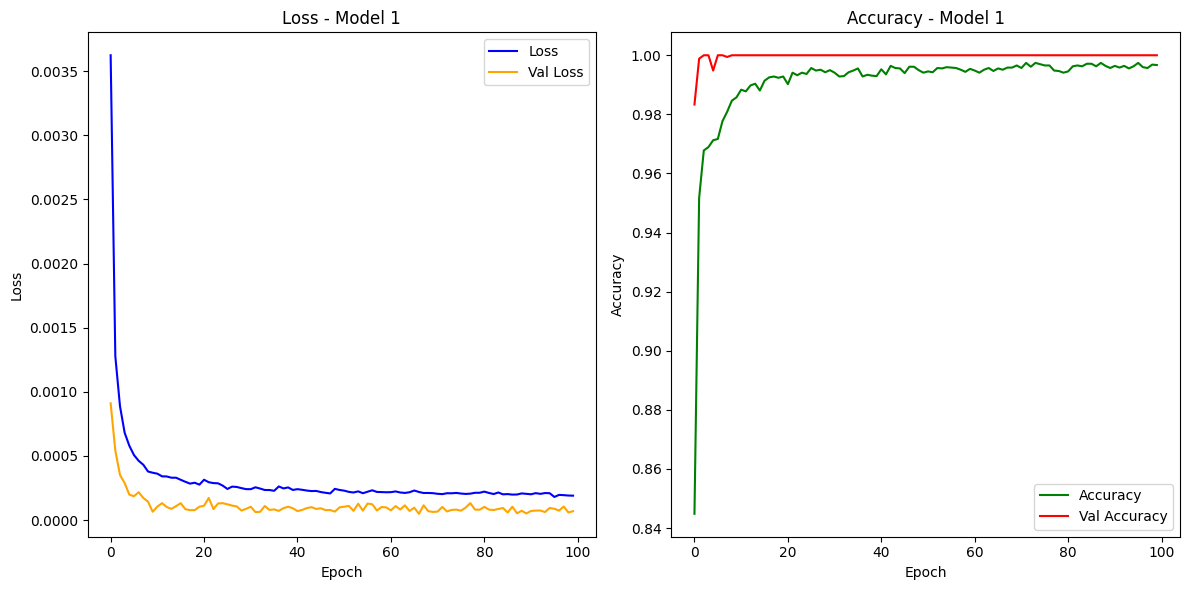

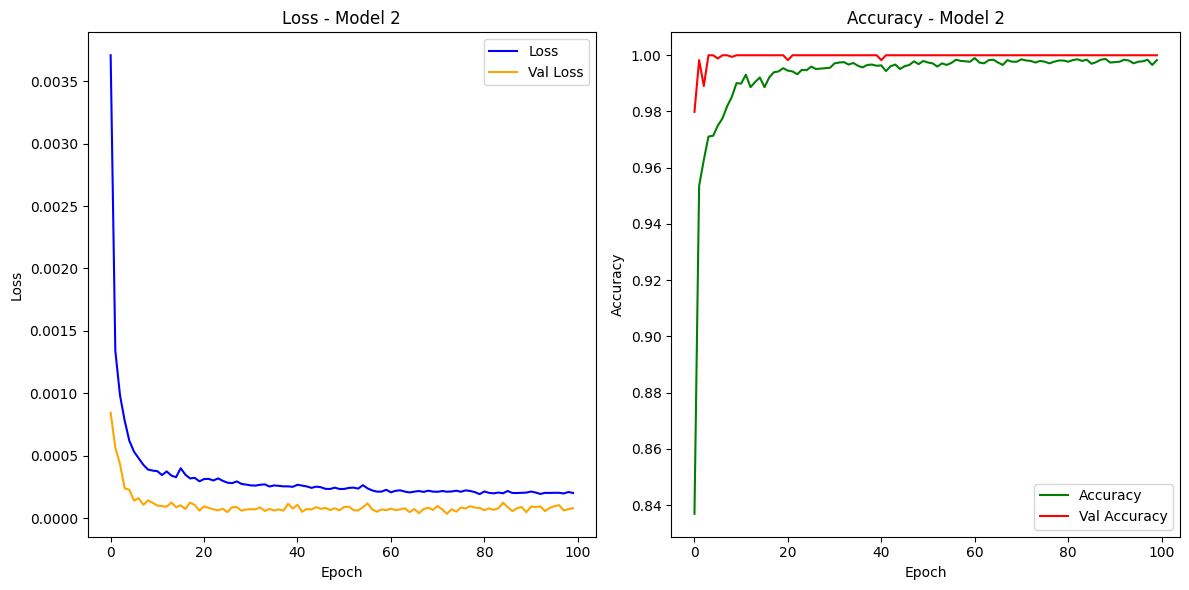

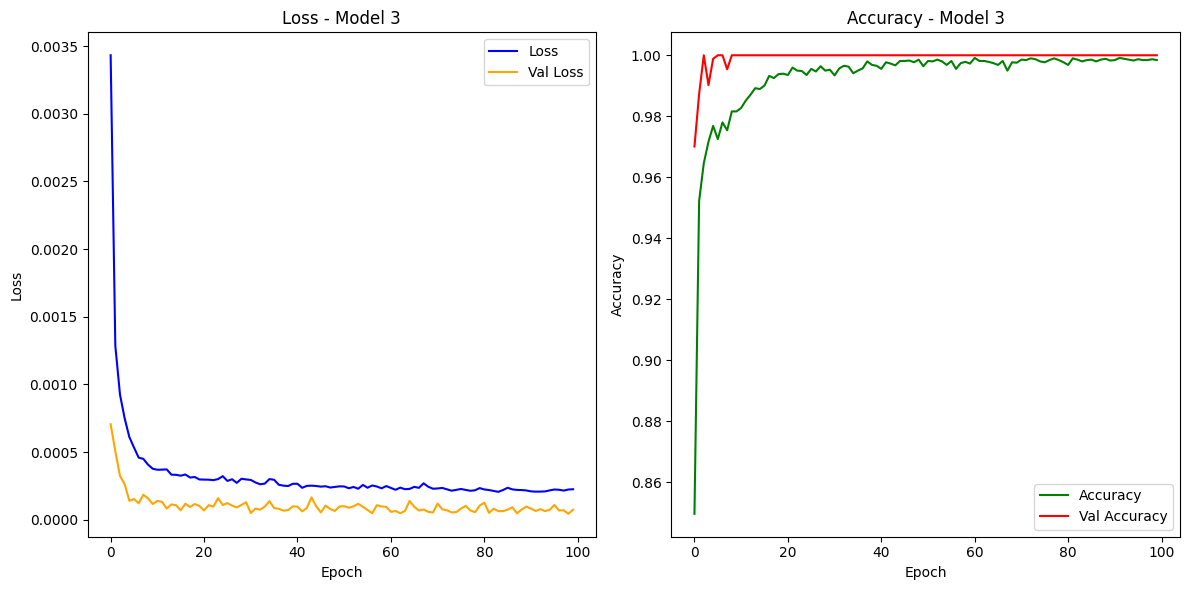

68/68 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 900us/step
Model 1 - RMSE: 0.0083, MAE: 0.0060, R¬≤: 0.9879
68/68 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 985us/step
Model 2 - RMSE: 0.0088, MAE: 0.0063, R¬≤: 0.9878
68/68 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step  
Model 3 - RMSE: 0.0086, MAE: 0.0064, R¬≤: 0.9886


In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. ƒê·∫£m b·∫£o m√¥ h√¨nh ƒë∆∞·ª£c bi√™n d·ªãch v·ªõi 'accuracy'
model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])
model_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# 2. Hu·∫•n luy·ªán c√°c m√¥ h√¨nh v·ªõi verbose=1
epochs = 100
batch_size = 32

# Hu·∫•n luy·ªán m√¥ h√¨nh 1 v√† hi·ªÉn th·ªã qu√° tr√¨nh hu·∫•n luy·ªán
history_1 = model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Hu·∫•n luy·ªán m√¥ h√¨nh 2 v√† hi·ªÉn th·ªã qu√° tr√¨nh hu·∫•n luy·ªán
history_2 = model_2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Hu·∫•n luy·ªán m√¥ h√¨nh 3 v√† hi·ªÉn th·ªã qu√° tr√¨nh hu·∫•n luy·ªán
history_3 = model_3.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# 3. Hi·ªÉn th·ªã k·∫øt qu·∫£ hu·∫•n luy·ªán
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))
    
    # V·∫Ω loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
    plt.title(f'Loss - {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # V·∫Ω accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
    plt.title(f'Accuracy - {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# V·∫Ω ƒë·ªì th·ªã cho t·ª´ng m√¥ h√¨nh
plot_history(history_1, 'Model 1')
plot_history(history_2, 'Model 2')
plot_history(history_3, 'Model 3')

# 4. ƒê√°nh gi√° m√¥ h√¨nh
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_flat = y_pred  # D·ªØ li·ªáu ƒë·∫ßu ra c√≥ th·ªÉ c·∫ßn chuy·ªÉn ƒë·ªïi t√πy thu·ªôc v√†o m√¥ h√¨nh

    # T√≠nh c√°c ch·ªâ s·ªë ƒë√°nh gi√°
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_flat))
    mae = mean_absolute_error(y_test, y_pred_flat)
    r2 = r2_score(y_test, y_pred_flat)

    return rmse, mae, r2

# ƒê√°nh gi√° m√¥ h√¨nh 1
rmse_1, mae_1, r2_1 = evaluate_model(model_1, X_test, y_test)
print(f'Model 1 - RMSE: {rmse_1:.4f}, MAE: {mae_1:.4f}, R¬≤: {r2_1:.4f}')

# ƒê√°nh gi√° m√¥ h√¨nh 2
rmse_2, mae_2, r2_2 = evaluate_model(model_2, X_test, y_test)
print(f'Model 2 - RMSE: {rmse_2:.4f}, MAE: {mae_2:.4f}, R¬≤: {r2_2:.4f}')

# ƒê√°nh gi√° m√¥ h√¨nh 3
rmse_3, mae_3, r2_3 = evaluate_model(model_3, X_test, y_test)
print(f'Model 3 - RMSE: {rmse_3:.4f}, MAE: {mae_3:.4f}, R¬≤: {r2_3:.4f}')


In [100]:
# ƒê√°nh gi√° m√¥ h√¨nh 1
rmse_1, mae_1, r2_1 = evaluate_model(model_1, X_test, y_test)
print(f'Model 1 - RMSE: {rmse_1:.4f}, MAE: {mae_1:.4f}, R¬≤: {r2_1:.4f}')

# ƒê√°nh gi√° m√¥ h√¨nh 2
rmse_2, mae_2, r2_2 = evaluate_model(model_2, X_test, y_test)
print(f'Model 2 - RMSE: {rmse_2:.4f}, MAE: {mae_2:.4f}, R¬≤: {r2_2:.4f}')

# ƒê√°nh gi√° m√¥ h√¨nh 3
rmse_3, mae_3, r2_3 = evaluate_model(model_3, X_test, y_test)
print(f'Model 3 - RMSE: {rmse_3:.4f}, MAE: {mae_3:.4f}, R¬≤: {r2_3:.4f}')


68/68 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 585us/step
Model 1 - RMSE: 0.0083, MAE: 0.0060, R¬≤: 0.9879
68/68 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 579us/step
Model 2 - RMSE: 0.0088, MAE: 0.0063, R¬≤: 0.9878
68/68 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 587us/step
Model 3 - RMSE: 0.0086, MAE: 0.0064, R¬≤: 0.9886


üîç So s√°nh hi·ªáu su·∫•t gi·ªØa c√°c m√¥ h√¨nh ANN v√† h·ªçc m√°y truy·ªÅn th·ªëng:
               Model      RMSE       MAE        R¬≤
5      Random Forest  0.007708  0.005185  0.999311
0      ANN - Model 1  0.008258  0.006029  0.987913
2      ANN - Model 3  0.008584  0.006362  0.988640
1      ANN - Model 2  0.008836  0.006328  0.987759
4      Decision Tree  0.011101  0.007296  0.998572
3  Linear Regression  0.067284  0.050529  0.941284
6                SVR  0.074649  0.061596  0.935700


C:\Users\Bon\AppData\Local\Temp\ipykernel_2124\2565075799.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Model", y="RMSE", palette="Blues_d")


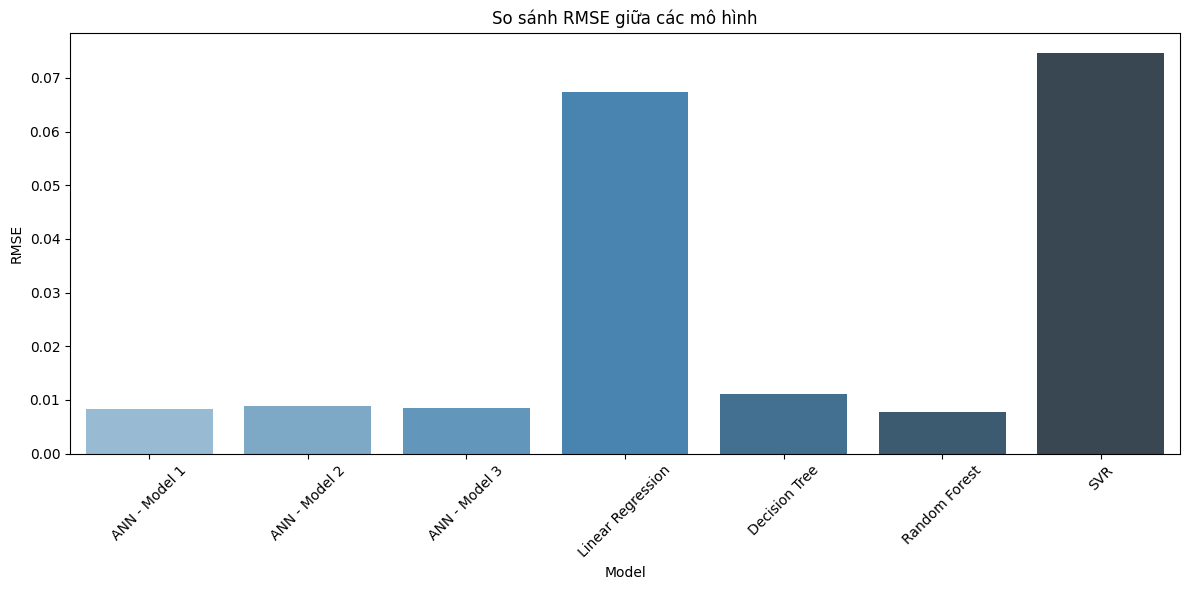

In [101]:
comparison_results = {
    "Model": [
        "ANN - Model 1",
        "ANN - Model 2",
        "ANN - Model 3",
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "SVR"
    ],
    "RMSE": [
        rmse_1, rmse_2, rmse_3,
        float(results_df.loc[results_df["Model"] == "Linear Regression", "RMSE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Decision Tree", "RMSE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Random Forest", "RMSE"].values[0]),
        float(results_df.loc[results_df["Model"] == "SVR", "RMSE"].values[0])
    ],
    "MAE": [
        mae_1, mae_2, mae_3,
        float(results_df.loc[results_df["Model"] == "Linear Regression", "MAE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Decision Tree", "MAE"].values[0]),
        float(results_df.loc[results_df["Model"] == "Random Forest", "MAE"].values[0]),
        float(results_df.loc[results_df["Model"] == "SVR", "MAE"].values[0])
    ],
    "R¬≤": [
        r2_1, r2_2, r2_3,
        float(results_df.loc[results_df["Model"] == "Linear Regression", "R¬≤"].values[0]),
        float(results_df.loc[results_df["Model"] == "Decision Tree", "R¬≤"].values[0]),
        float(results_df.loc[results_df["Model"] == "Random Forest", "R¬≤"].values[0]),
        float(results_df.loc[results_df["Model"] == "SVR", "R¬≤"].values[0])
    ],
}

comparison_df = pd.DataFrame(comparison_results)

print("üîç So s√°nh hi·ªáu su·∫•t gi·ªØa c√°c m√¥ h√¨nh ANN v√† h·ªçc m√°y truy·ªÅn th·ªëng:")
print(comparison_df.sort_values(by="RMSE"))

# Tr·ª±c quan h√≥a RMSE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x="Model", y="RMSE", palette="Blues_d")
plt.xticks(rotation=45)
plt.title("So s√°nh RMSE gi·ªØa c√°c m√¥ h√¨nh")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()
